
#**Introduction to AL,ML,DL,CV**
#**University of Technology Sydney (UTS)**
#**Date:** Nov 20, 2024

## **Demo: Image Classification using CNN**

In this  Demo session you will understand how Convolutional Neural Network are used for Multi-class Image classification!

So lets get started!

## **Dataset used:**
Fashion MNIST dataset.



### **Step 1: Import required packages**

We will need tensorflow, numpy, os and keras


In [1]:
import tensorflow as tf
import os
import numpy as np
import math, numpy as np
import sklearn.datasets
import matplotlib.pyplot as plt
import h5py
import glob
import cv2
import keras.utils as image


### **Step 2: Download the Fashion Mnist dataset using keras**

In [2]:
fashionMnist=tf.keras.datasets.fashion_mnist

In [3]:
# Load data from fashion mnist dataset using the load_data() method.
(train_images, train_labels), (test_images, test_labels) = fashionMnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# Display the shapes of the training images
print(train_images.shape)
print(train_images.dtype)

(60000, 28, 28)
uint8


In [5]:
#define the class names for the fashion mnist dataset
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

3


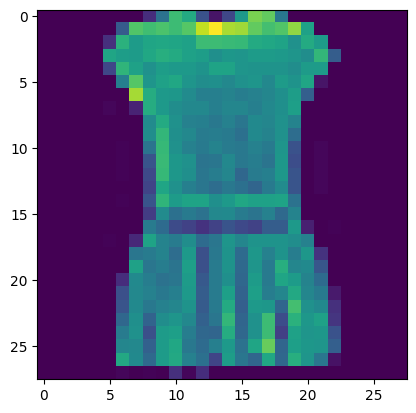

In [6]:
## Display an image from the dataset
import matplotlib.pyplot as plt
plt.imshow(train_images[3])
print(train_labels[3])

**Note :** Scikit-learn import the Fashion MNIST dataset as a 1-D array while Keras API load the dataset in 28X28 format.

### Example: Using Gemini to generate code

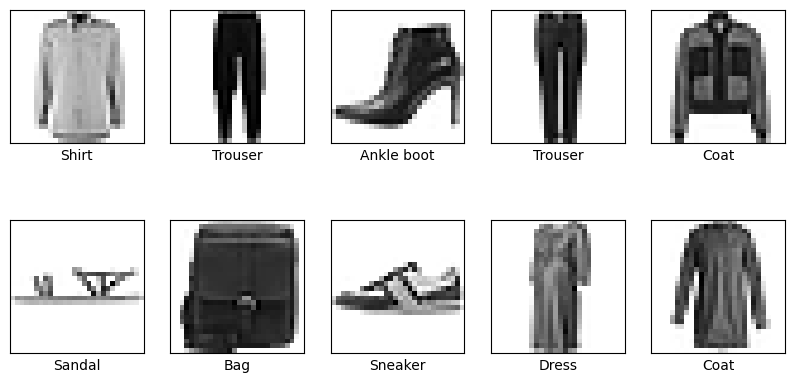

In [22]:
# prompt: write code to show 10 random image from fashion mnist dataset

import random

# Assuming train_images and class_names are defined as in the provided code.

# Select 10 random indices from the training set
random_indices = random.sample(range(len(train_images)), 10)

# Create a figure with subplots for the images
plt.figure(figsize=(10, 5))

for i, index in enumerate(random_indices):
    plt.subplot(2, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[index], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[index]])

plt.show()

### **Step 3: Normalize the dataset and split a small part of the training set into validation set**


- Validation set: first 5000 samples (total 5000 samples)
- Training set: 5000 to remaining (total 55000 samples)

In [7]:
## Hint: Using slicing to split the training to train and validation

train_images=train_images.reshape(60000, 28, 28, 1)
valid_images= train_images[:5000] / 255.0
valid_labels = train_labels[:5000]

train_images  = train_images[5000:] / 255.0
train_labels=train_labels[5000:]

test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images / 255.0


In [8]:
# Print the shapes for Train, Validation, and Test dataset.
print(np.shape(train_images))
print(np.shape(valid_images))
print(np.shape(test_images))

(55000, 28, 28, 1)
(5000, 28, 28, 1)
(10000, 28, 28, 1)


[**Expected** Output]

(55000, 28, 28)
(5000, 28, 28)
(10000, 28, 28)

### **Step 4:  Design the CNN Architecture**

Design the following CNN architecture:

<img src='http://drive.google.com/uc?export=view&id=1af-9cnzOpZzNf_02zdJB06zanaU3LrY2' alt='Conv'>


Input: $28 X 28 X 1$ image

Activation function in CONV layer: Relu

Kernel Size: 3 X 3

Activation function in Output layer : softmax, 10 classes

**Hint:** Use Conv2D(), MaxPooling2D(), Flatten(), and Dense()



In [9]:
model = tf.keras.models.Sequential([
  # Create CONV layers
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),

  # Flatten layer
  tf.keras.layers.Flatten(),

  # Add Fully connected layer /Dense layer
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## **Notes:**
* **Sequential model.** This is the simplest kind of Keras model, for neural networks which defines a SEQUENCE of layers.

* **Flatten.** Flatten just takes that image and turns it into a 1-dimensional vector.

* Next we add a second Dense hidden layer with 128 neurons, also using the ReLU activation function.  **Dense.** Add a layer to the neural network which is followed by activation function of ReLU. The ReLU only passes the value greater than 0 and for all other values of X it passes 0.
e.g. If X>0 return X, else return 0"

* Finally, we add a Dense output layer with 10 neurons (one per class), using the softmax activation function.

* **Softmax** The softmax takes a set of values and select the biggest one from the set of values.

### **Visualize the CNN Architecture**

Using plot_model from keras.utils

**Requires**: pydot, pydotplus, graphviz (Available on Google Colab already, installation not required)

*   pip install pydot
*   pip install pydotplus
* pip install graphviz

**Reference:** https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model


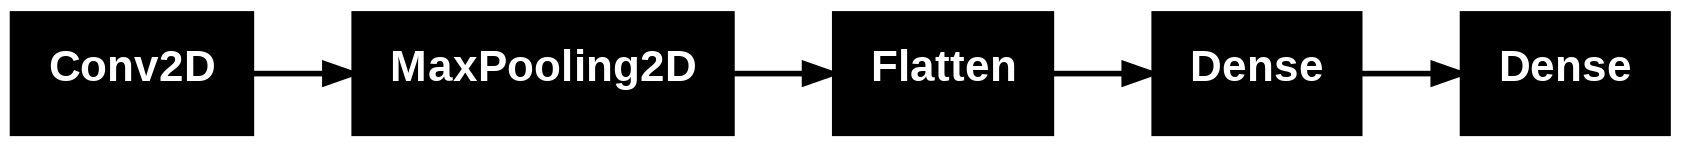

In [20]:
# Using Plot_Model from Keras.Utils
model_img_file = 'Simple-CNN.png'
tf.keras.utils.plot_model(model, to_file=model_img_file,
                          show_shapes=False,
                          show_layer_activations=False,
                          rankdir='LR', # Options: TB, LR
                          show_dtype=False,
                          show_layer_names=False )

# Also Try:
# show_shapes=True, show_layer_activations=True, show_dtype=True, show_layer_names=True

## **Step 5: Training the model**

**"sparse_categorical_crossentropy":**   The dataset contains sparse labels and the classes are exclusive.

**One-hot vector encoding** This is sometime used for encoding the labels if there one target  probability per class for each instance. For example.
[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.] represent one-hot encoding for class 4. In such case, **"categorical_crossentropy"** loss is used.

**"sigmoid_crossentropy"** This loss is used for binary class classification problems and also **"sigmoid"** activation function is used instead of Softmax.



In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 10816)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,384,576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,386,506 (5.29 MB)

 Trainable params: 1,386,506 (5.29 MB)

 Non-trainable params: 0 (0.00 B)

###**Understanding on Number of Traninable Parameters:**

1. **CONV Layer 1:** 3X3 (Filter) X 64 (number of filters) + 64 (Bias term X number of filters) = **640**

2. **POOL Layer parameter** = 0, no training parameters in POOL layer
3. **Flatten layer parameter** = 0, no traning parameters in Flatten layer
4. **Dense Layer 1: **128 X 10816 (from flatten layer) + 128 (bias term) = **1384576**
5. **Dense Layer 2:** 128 (From dense layer 1) X 10 + 10 (Bias term) = **1290**

6. **Total Trainable parameters:** 640 + 1384576 + 1290 = **1386506**

In [21]:
# Start Training
history = model.fit(train_images, train_labels, epochs=15)

Epoch 1/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9535 - loss: 0.1222
Epoch 2/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9648 - loss: 0.0973
Epoch 3/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9703 - loss: 0.0809
Epoch 4/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9748 - loss: 0.0701
Epoch 5/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9797 - loss: 0.0567
Epoch 6/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9829 - loss: 0.0498
Epoch 7/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9859 - loss: 0.0394
Epoch 8/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9882 - loss: 0.0364
Epoch 9/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9902 - loss: 0.0299
Epoch 10/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9916 - loss: 0.0249
Epoch 11/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9912 - loss: 0.0262
Epoch 12/15
1719/1719 ━━━━━━━━

In [13]:
# Process the test images and find the accuracy
test_loss = model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9150 - loss: 0.2565


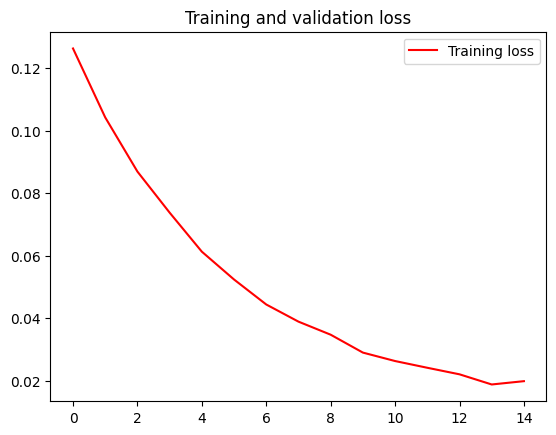

In [23]:
loss = history.history['loss']
#val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
#plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()



## **Step 6: Evaluation on test dataset**

In [24]:
model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9119 - loss: 0.5681


[0.5591312050819397, 0.9128000140190125]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Sandal
Actual class: Sandal


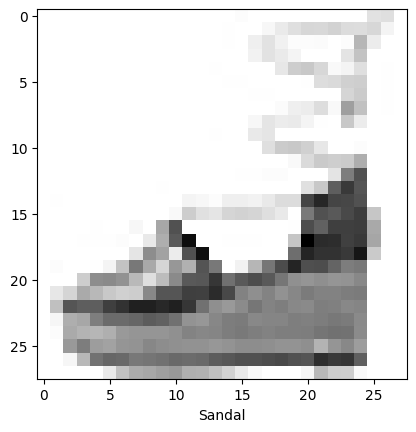

In [26]:
# prompt: write code to predict the class of single image using the trained model and a random image from Fashion Mnist dataset

# Predict the class of a single image
random_index = np.random.randint(0, len(test_images))
image = test_images[random_index]
image = np.expand_dims(image, axis=0)  # Add batch dimension
prediction = model.predict(image)
predicted_class = np.argmax(prediction)
actual_class = test_labels[random_index]

print(f"Predicted class: {class_names[predicted_class]}")
print(f"Actual class: {class_names[actual_class]}")

# Display the image
plt.imshow(test_images[random_index].reshape(28, 28), cmap=plt.cm.binary)
plt.xlabel(class_names[actual_class])
plt.show()